In [1]:
#importing Important Library

import re
import numpy as np
import pandas as pd
import nltk

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.preprocessing import StandardScaler

In [2]:
#Loading Data

gpu = pd.read_csv('GPU.csv')
xy = pd.read_csv('Task-x-y.csv')
ac = pd.read_csv('Application-checkpoints.csv')

Now lets explore the data structure

In [3]:
# Shape of the data frame 

print(f"Shape of GPU : {gpu.shape}")
print(f"Shape of Task-x-y : {xy.shape}")
print(f"Shape of Application-checkpoints : {ac.shape}")

Shape of GPU : (1048575, 8)
Shape of Task-x-y : (65793, 5)
Shape of Application-checkpoints : (660400, 6)


So Now we know that three data frames have different frame and different entries of data.

In [4]:
# Summary structure of each column of each data frame

print(gpu.info())
print(xy.info())
print(ac.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   timestamp       1048575 non-null  object 
 1   hostname        1048575 non-null  object 
 2   gpuSerial       1048575 non-null  float64
 3   gpuUUID         1048575 non-null  object 
 4   powerDrawWatt   1048575 non-null  float64
 5   gpuTempC        1048575 non-null  int64  
 6   gpuUtilPerc     1048575 non-null  int64  
 7   gpuMemUtilPerc  1048575 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65793 entries, 0 to 65792
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   taskId  65793 non-null  object
 1   jobId   65793 non-null  object
 2   x       65793 non-null  int64 
 3   y       65793 non-null  int64 
 4   level   65793 non-nul

 Lets Dig for deeper understanding of data frames.

 To undestand the data better looking into few entries of the data frames

In [5]:
print("------------ GPU ----------------")
gpu.head()

------------ GPU ----------------


,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,3.232170e+11,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,3.236170e+11,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,3.232170e+11,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,3.252170e+11,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,3.232170e+11,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [6]:
print("------------ task-x-y ----------------")
xy.head()

------------ task-x-y ----------------


,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [7]:
print("------------ ac ----------------")
ac.head()

------------ ac ----------------


,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d


It will be an easier analysis if all three dataframes combined into one, but before that we need to remove column with null or na entry.

In [8]:
# Dropping NULL or NA entries.

ac.dropna(inplace=True)
xy.dropna(inplace=True)
gpu.dropna(inplace=True)

In [9]:
# Merging 2 dataframes based on columns using join operation

merged_table = xy.merge( ac, on=['jobId','taskId'], how='outer')

merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660400 entries, 0 to 660399
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   taskId     660400 non-null  object
 1   jobId      660400 non-null  object
 2   x          660400 non-null  int64 
 3   y          660400 non-null  int64 
 4   level      660400 non-null  int64 
 5   timestamp  660400 non-null  object
 6   hostname   660400 non-null  object
 7   eventName  660400 non-null  object
 8   eventType  660400 non-null  object
dtypes: int64(3), object(6)
memory usage: 50.4+ MB


#Now attempting to merge the third dataframe to already existing  merged dataframes

merged_table1 = ac.merge( gpu, on=['hostname'], how='outer')

After multiple attempts kernel died, so instead of combining the dataframes, preferring to work in seperate data frame

In [10]:
# Checking for any duplicate entries in the dataset for each data frames

print(f"Duplicate entried in  GPU : {gpu.duplicated().sum()}")
print(f"Duplicate entried in  Task-x-y : {xy.duplicated().sum()}")
print(f"Duplicate entried in  Application-checkpoints : {ac.duplicated().sum()}")

Duplicate entried in  GPU : 6
Duplicate entried in  Task-x-y : 0
Duplicate entried in  Application-checkpoints : 2470


In [11]:
# Removing duplicate entries

gpu.drop_duplicates(inplace=True)
xy.drop_duplicates(inplace=True)
ac.drop_duplicates(inplace=True)

# GOAL 1 : Which event types dominate task runtimes?

Lets first check how many types of events are present 

In [12]:
# Checking the number of unique events in the dataset

ac['eventName'].unique()

array(['Tiling', 'Saving Config', 'Render', 'TotalRender', 'Uploading'],
      dtype=object)

So there are 5 even types. Lets which takes maximum run times among these 5 events. each event has a entry when is START and when it STOP.

In [13]:
# Conversion of timestamp column to datetime for easier duration calculation in future

ac['timestamp'] = pd.to_datetime(ac['timestamp'])
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'])


In [14]:
# Converting timestamp to time calculate time


#convert timestmap to seconds


ac['time_seconds'] = ac['timestamp'].dt.hour*3600 + ac['timestamp'].dt.minute*60 + ac['timestamp'].dt.second


In [15]:
# Dropping other columns which wont be required

ACdrop = ac.drop(columns=['hostname','jobId','taskId','timestamp'])
print(ACdrop)

            eventName eventType  time_seconds
0              Tiling      STOP         27715
1       Saving Config     START         27749
2       Saving Config      STOP         27749
3              Render     START         27749
4         TotalRender      STOP         27793
...               ...       ...           ...
660395         Tiling      STOP         30610
660396      Uploading      STOP         30610
660397         Tiling      STOP         30614
660398    TotalRender      STOP         30614
660399      Uploading      STOP         30612

[657930 rows x 3 columns]


In [16]:
# Grouping based on event name and their event type


ACdrop = ACdrop.groupby(by=['eventName','eventType']).sum()
print(ACdrop)

                         time_seconds
eventName     eventType              
Render        START        1915934995
              STOP         1918646223
Saving Config START        1915934825
              STOP         1915934989
Tiling        START        1918646691
              STOP         1918710709
TotalRender   START        1915934819
              STOP         1918737852
Uploading     START        1918646230
              STOP         1918737844


In [17]:
# Calculate Duration between START and STOP of each event


ACdrop['duration'] = ACdrop.groupby('eventName')['time_seconds'].diff()
ACdrop['duration'] = ACdrop['duration'].fillna(0)
ACdrop['duration'] = ACdrop['duration'].astype(int)
print(ACdrop)

                         time_seconds  duration
eventName     eventType                        
Render        START        1915934995         0
              STOP         1918646223   2711228
Saving Config START        1915934825         0
              STOP         1915934989       164
Tiling        START        1918646691         0
              STOP         1918710709     64018
TotalRender   START        1915934819         0
              STOP         1918737852   2803033
Uploading     START        1918646230         0
              STOP         1918737844     91614


In [18]:
# Dropping the unnecessary entry

ACdrop = ACdrop[ACdrop['duration'] !=0]
ACdrop = ACdrop.drop(columns =['time_seconds'])
print(ACdrop)

                         duration
eventName     eventType          
Render        STOP        2711228
Saving Config STOP            164
Tiling        STOP          64018
TotalRender   STOP        2803033
Uploading     STOP          91614


From context, we can eliminate event name ="Total Render", as it means total of all the other events.

In [19]:
# Dropping the unnecessary entry i.e. 'eventName' != 'TotalRender'


ACdrop = ACdrop[ACdrop.index.get_level_values('eventName') != 'TotalRender']

<AxesSubplot:xlabel='eventName', ylabel='duration'>

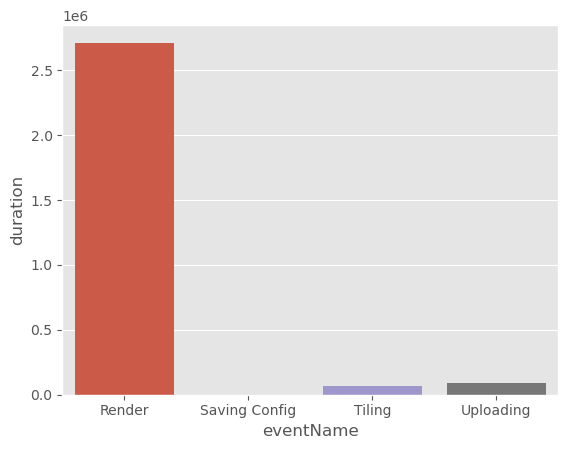

In [20]:
sns.barplot(x= ACdrop.index.get_level_values('eventName'), y=ACdrop['duration'])

So from this data it is very much clear that "Render" event dominates task runtimes. And overall of the total runtime i.e. Total render, "Render" gains the maximum runtimes.

GOAL 2 : What is the interplay between GPU temperature and performance?

For this particular task, we only require 2 parameters that define performance of GPU and GPU temperature, thus eliminating the rest of column and calculating correlation of each factor via corr()

In [21]:
# Dropping unnecesary column

ac_gpu_cor = gpu.iloc[: , 5:8]
ac_gpu_cor.head(15)

,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,48,92,53
1,40,92,48
2,45,91,44
3,38,90,43
4,41,90,47
5,43,88,40
6,41,91,47
7,35,0,0
8,43,93,56
9,36,90,40


Now lets calculate the correlation of gpuTempC vs Performance i.e. gpuUtilPerc and gpuMemUtilPerc.

In [22]:
# Correlation of the gpuTempC and gpuUtilPerc

util = ac_gpu_cor['gpuTempC'].corr(ac_gpu_cor['gpuUtilPerc'])
print(f" GPU Temp v/s GPU Utilization : {util}")


 GPU Temp v/s GPU Utilization : 0.5012905440289371


This indicates a moderate positive correlation between the gpuTempC and gpuUtilPerc. 

In [23]:
# Correlation of the gpuTempC and gpuMemUtilPerc

mem = ac_gpu_cor['gpuTempC'].corr(ac_gpu_cor['gpuMemUtilPerc'])
print(f" GPU Temp v/s GPU Memory Utilization : {mem}")

 GPU Temp v/s GPU Memory Utilization : 0.488604371731998


This indicates a moderate positive correlation between the gpuTempC and gpuMemUtilPerc. 
However, the correlation is weaker of gpuTempC & gpuMemUtilPerc as compared to   gpuTempC & gpuUtilPerc.

#    # Goal 3 : What is the interplay between increased power draw and render time? Can we quantify the variation in computation requirements for particular tiles?

For this task we need to combine the data frames ac and gpu, however last time attempt was failed. Lets try it with merge() function

In [24]:
# Attempting to merge AC and GPU

ac_gpu = ac.merge(gpu)

ac_gpu.info()
ac_gpu.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   timestamp       231 non-null    datetime64[ns, UTC]
 1   hostname        231 non-null    object             
 2   eventName       231 non-null    object             
 3   eventType       231 non-null    object             
 4   jobId           231 non-null    object             
 5   taskId          231 non-null    object             
 6   time_seconds    231 non-null    int64              
 7   gpuSerial       231 non-null    float64            
 8   gpuUUID         231 non-null    object             
 9   powerDrawWatt   231 non-null    float64            
 10  gpuTempC        231 non-null    int64              
 11  gpuUtilPerc     231 non-null    int64              
 12  gpuMemUtilPerc  231 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(

,timestamp,hostname,eventName,eventType,jobId,taskId,time_seconds,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08 07:42:59.534000+00:00,265232c5f6814768aeefa66a7bec6ff6000016,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2b887c36-8537-449c-8897-55d26e5f62b8,27779,3.232170e+11,GPU-6e17bcb9-d052-97d5-8066-32fe4ff15313,31.26,44,0,0
1,2018-11-08 07:42:59.534000+00:00,265232c5f6814768aeefa66a7bec6ff6000016,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,2b887c36-8537-449c-8897-55d26e5f62b8,27779,3.232170e+11,GPU-6e17bcb9-d052-97d5-8066-32fe4ff15313,31.26,44,0,0
2,2018-11-08 07:43:01.207000+00:00,4ad946d4435c42dabb5073531ea4f31500000R,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,9667bc99-6f91-4e14-af15-bec9b14ed888,27781,3.251170e+11,GPU-5d40da2a-c371-35b4-73fd-ee622b82220e,43.49,34,0,0
3,2018-11-08 07:43:01.207000+00:00,4ad946d4435c42dabb5073531ea4f31500000R,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,9667bc99-6f91-4e14-af15-bec9b14ed888,27781,3.251170e+11,GPU-5d40da2a-c371-35b4-73fd-ee622b82220e,43.49,34,0,0
4,2018-11-08 07:44:17.692000+00:00,0d56a730076643d585f77e00d2d8521a00000A,Uploading,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b2a466b7-3342-4514-9179-ca78782faaa6,27857,3.252170e+11,GPU-4874f64b-15e0-8520-6398-0e89c25ba61a,49.47,44,0,0
5,2018-11-08 07:44:17.692000+00:00,0d56a730076643d585f77e00d2d8521a00000A,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b2a466b7-3342-4514-9179-ca78782faaa6,27857,3.252170e+11,GPU-4874f64b-15e0-8520-6398-0e89c25ba61a,49.47,44,0,0
6,2018-11-08 07:53:31.944000+00:00,6139a35676de44d6b61ec247f0ed865700000B,TotalRender,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,cb427324-b05c-4b9d-a59c-331c04d07104,28411,3.250170e+11,GPU-39d5bab7-9ab6-ea14-37c8-505ec3f8b612,25.88,37,0,0
7,2018-11-08 07:53:31.944000+00:00,6139a35676de44d6b61ec247f0ed865700000B,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,cb427324-b05c-4b9d-a59c-331c04d07104,28411,3.250170e+11,GPU-39d5bab7-9ab6-ea14-37c8-505ec3f8b612,25.88,37,0,0
8,2018-11-08 07:54:07.110000+00:00,4ad946d4435c42dabb5073531ea4f315000019,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,734e61ae-ddc9-4745-98cb-d3995fd9d701,28447,3.250170e+11,GPU-060d05a9-cf3e-4da2-15d5-66cbc02705ea,42.71,39,0,0
9,2018-11-08 07:54:07.110000+00:00,4ad946d4435c42dabb5073531ea4f315000019,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,734e61ae-ddc9-4745-98cb-d3995fd9d701,28447,3.250170e+11,GPU-060d05a9-cf3e-4da2-15d5-66cbc02705ea,42.71,39,0,0


The last attempt of merging might have failed due to the extra parameters provided such as "on" and "how". Nevertheless, kernel has successfully executed this operation so we can go ahead to carry further operation

In [25]:
# Dropping the unrequired columns

ac_gpu.drop(['hostname','taskId','gpuSerial','gpuUUID', 'jobId', 'gpuUtilPerc', 'gpuMemUtilPerc'], inplace=True, axis=1)
ac_gpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   timestamp      231 non-null    datetime64[ns, UTC]
 1   eventName      231 non-null    object             
 2   eventType      231 non-null    object             
 3   time_seconds   231 non-null    int64              
 4   powerDrawWatt  231 non-null    float64            
 5   gpuTempC       231 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 12.6+ KB


In [26]:
# Conversion of timestamp into time to calculate rendertime

drop_ag = pd.DataFrame()
drop_ag = ac_gpu

# Convert 'timestamp'  to datetime
drop_ag['timestamp'] = pd.to_datetime(drop_ag['timestamp'])
drop_ag['time'] = drop_ag['timestamp'].dt.time


# Convert timestmap to seconds
drop_ag['time_seconds'] = drop_ag['timestamp'].dt.hour*3600 + drop_ag['timestamp'].dt.minute*60 + drop_ag['timestamp'].dt.second

Now, lets remove unncessary columns and entry which is not required for this goal like three column giving time information. Also since our task is about event "render", rest of the columns can be removed.

In [27]:
# Dropping unnecesary columns

drop_ag.drop(['timestamp','time'], inplace=True, axis=1)

print(drop_ag.head(10))

# Remove all entries except 'eventName' = 'Render'
render_ag = drop_ag[drop_ag['eventName'] == 'Render']

render_ag.head(10)

       eventName eventType  time_seconds  powerDrawWatt  gpuTempC
0    TotalRender      STOP         27779          31.26        44
1      Uploading      STOP         27779          31.26        44
2      Uploading      STOP         27781          43.49        34
3    TotalRender      STOP         27781          43.49        34
4      Uploading      STOP         27857          49.47        44
5    TotalRender      STOP         27857          49.47        44
6    TotalRender     START         28411          25.88        37
7  Saving Config     START         28411          25.88        37
8         Render      STOP         28447          42.71        39
9      Uploading     START         28447          42.71        39


,eventName,eventType,time_seconds,powerDrawWatt,gpuTempC
8,Render,STOP,28447,42.71,39
17,Render,START,28901,28.70,39
18,Render,STOP,28916,41.13,38
22,Render,STOP,27931,41.78,35
34,Render,START,28250,42.72,40
39,Render,START,28369,44.69,40
40,Render,STOP,28371,48.43,43
46,Render,START,29158,24.64,35
50,Render,STOP,30490,43.39,41
51,Render,STOP,29332,41.62,40


Interplay between increased draw and render time for eventname= 'RENDER' comparing the power draw in watts at different stages of event i.e the 'START' and 'STOP'.

In [28]:
# Calculating the avg of power drawn in each stage by grouping by 'eventType' 

rss = render_ag.groupby('eventType').mean()
print(rss)

           time_seconds  powerDrawWatt   gpuTempC
eventType                                        
START      28735.500000      34.491875  37.500000
STOP       29038.952381      44.298095  39.809524


<AxesSubplot:xlabel='eventType', ylabel='powerDrawWatt'>

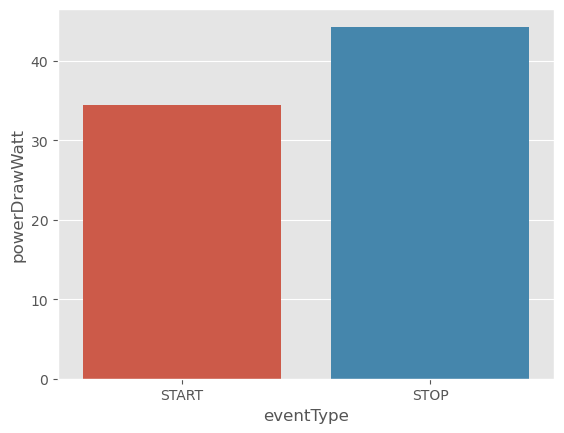

In [29]:
# Plotting the graph of power drawn during START_STOP for Render

sns.barplot(x= rss.index.get_level_values('eventType'), y=rss['powerDrawWatt'])

From the Bar chart it can be interperted of that for 'Render' Event on an average during 'STOP' more power is drawn as compared to 'START'. Thus drawing the conclusion that as the event 'Render' progresses more wattage is used.

For second part of the goal to quantify the variation in computation requirements like  powerDrawWatt, gpuTempC etc for each tiles,and thus we need to group them based on eventname and eventtype

#1 : Computational Parameter considered is powerDrawWatt

In [30]:
# Grouping by eventname and eventtype, and 
# Calculating sum of Power drawn during each stage of each event
#NOTE : the dataframe where all the chosen columns are there 

ac_gpu2 = drop_ag.groupby(by=['eventName','eventType']).sum()

ac_gpu2.head(10)

time_seconds  powerDrawWatt  gpuTempC
eventName     eventType                                       
Render        START            459768         551.87       600
              STOP             609818         930.26       836
Saving Config START            729163         876.63       936
              STOP             459768         551.87       600
Tiling        START           1104131        1717.11      1510
              STOP             729816        1081.14       982
TotalRender   START            640507         764.89       823
              STOP             725100        1072.62       977
Uploading     START            520313         802.46       723
              STOP             724224        1080.54       978

In [31]:
#Calculating the power difference between START and STOP of each event 

ac_gpu2['Utilized_Power'] = ac_gpu2.groupby('eventName')['powerDrawWatt'].diff()
ac_gpu2['Utilized_Power'] = ac_gpu2['Utilized_Power'].fillna(0)
ac_gpu2.info()
ac_gpu2.head(10)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, ('Render', 'START') to ('Uploading', 'STOP')
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time_seconds    10 non-null     int64  
 1   powerDrawWatt   10 non-null     float64
 2   gpuTempC        10 non-null     int64  
 3   Utilized_Power  10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 512.0+ bytes


time_seconds  powerDrawWatt  gpuTempC  Utilized_Power
eventName     eventType                                                       
Render        START            459768         551.87       600            0.00
              STOP             609818         930.26       836          378.39
Saving Config START            729163         876.63       936            0.00
              STOP             459768         551.87       600         -324.76
Tiling        START           1104131        1717.11      1510            0.00
              STOP             729816        1081.14       982         -635.97
TotalRender   START            640507         764.89       823            0.00
              STOP             725100        1072.62       977          307.73
Uploading     START            520313         802.46       723            0.00
              STOP             724224        1080.54       978          278.08

Now that the power drawn per event is calculated while the event was carried out from START to STOP. 
Lets remove unwanted entries like Total Render and where Utilized_Power=0

In [32]:
# Removing unwanted entries

# Removing event : Total Render

ac_gpu2 = ac_gpu2[ac_gpu2.index.get_level_values('eventName') != 'TotalRender']

# Only keeping STOP entries for each event

ac_gpu2 = ac_gpu2[ac_gpu2.index.get_level_values('eventType') == 'STOP']

ac_gpu2.head(10)

,,time_seconds,powerDrawWatt,gpuTempC,Utilized_Power
eventName,eventType,,,,
Render,STOP,609818,930.26,836,378.39
Saving Config,STOP,459768,551.87,600,-324.76
Tiling,STOP,729816,1081.14,982,-635.97
Uploading,STOP,724224,1080.54,978,278.08


<AxesSubplot:xlabel='eventName', ylabel='Utilized_Power'>

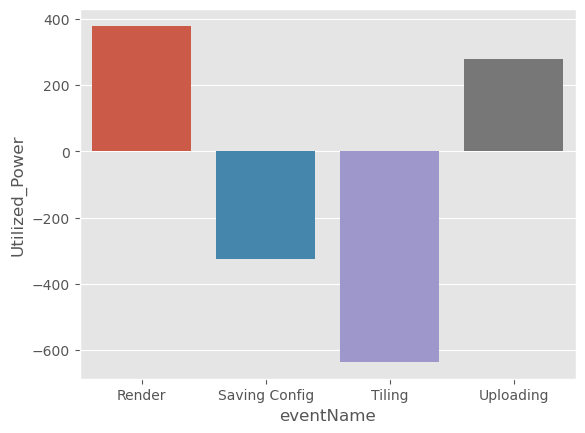

In [33]:
# Plotting the graph of power drawn during all events from START to STOP

sns.barplot(x= ac_gpu2.index.get_level_values('eventName'), y=ac_gpu2['Utilized_Power'])

From the Bar chart it can be interperted of that for each Event during the progress ie. 'START' to 'STOP' power consumption varies. 

Thus drawing the conclusion that as the event 'Render' consumes more out of all events, followed by uploading, saving config, Tiling.

With the progress of event 'Saving Config' and 'Tiling' less power is drawn thus it has negative growth.

Render also dominates the Runtimes of all event, which is well justified now.


#2 : Computational Parameter considered is gpuTempC 

Repeating the above steps for gpuTempC as powerDrawWatt.

In [34]:
# Grouping by eventname and eventtype, and 
# Calculating avg of gpuTempC during each stage of each event
#NOTE : the dataframe where all the chosen columns are there 

ac_gpu3 = drop_ag.groupby(by=['eventName','eventType']).sum()

ac_gpu3.head(10)

time_seconds  powerDrawWatt  gpuTempC
eventName     eventType                                       
Render        START            459768         551.87       600
              STOP             609818         930.26       836
Saving Config START            729163         876.63       936
              STOP             459768         551.87       600
Tiling        START           1104131        1717.11      1510
              STOP             729816        1081.14       982
TotalRender   START            640507         764.89       823
              STOP             725100        1072.62       977
Uploading     START            520313         802.46       723
              STOP             724224        1080.54       978

In [35]:
# Difference calculation based on 
ac_gpu3['tempdiff'] = ac_gpu3.groupby('eventName')['gpuTempC'].diff()

ac_gpu3.head(10)

time_seconds  powerDrawWatt  gpuTempC  tempdiff
eventName     eventType                                                 
Render        START            459768         551.87       600       NaN
              STOP             609818         930.26       836     236.0
Saving Config START            729163         876.63       936       NaN
              STOP             459768         551.87       600    -336.0
Tiling        START           1104131        1717.11      1510       NaN
              STOP             729816        1081.14       982    -528.0
TotalRender   START            640507         764.89       823       NaN
              STOP             725100        1072.62       977     154.0
Uploading     START            520313         802.46       723       NaN
              STOP             724224        1080.54       978     255.0

In [36]:
# Removing unwanted entries

# Removing event : Total Render

ac_gpu3 = ac_gpu3[ac_gpu3.index.get_level_values('eventName') != 'TotalRender']

# Only keeping STOP entries for each event

ac_gpu3 = ac_gpu3[ac_gpu3.index.get_level_values('eventType') == 'STOP']

ac_gpu3.head(10)

,,time_seconds,powerDrawWatt,gpuTempC,tempdiff
eventName,eventType,,,,
Render,STOP,609818,930.26,836,236.0
Saving Config,STOP,459768,551.87,600,-336.0
Tiling,STOP,729816,1081.14,982,-528.0
Uploading,STOP,724224,1080.54,978,255.0


<AxesSubplot:xlabel='eventName', ylabel='tempdiff'>

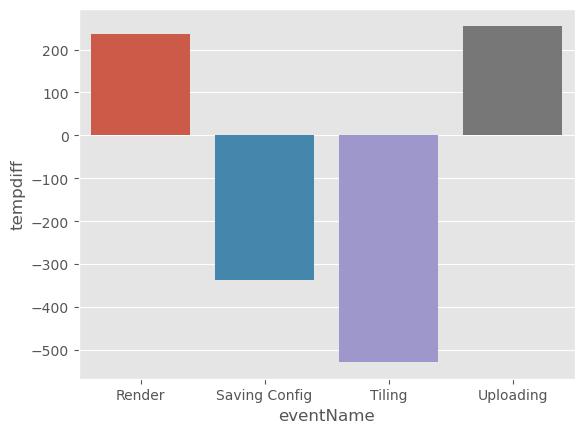

In [37]:
# Plotting the graph of power drawn during all events from START to STOP

sns.barplot(x= ac_gpu3.index.get_level_values('eventName'), y=ac_gpu3['tempdiff'])

From the Bar chart it can be interperted of that for each Event during the progress ie. 'START' to 'STOP' gpuTempC varies. 

Thus drawing the conclusion that as the event 'Uploading' GPU temp is highest out of all events, followed by render, saving config, Tiling.

With the progress of event 'Saving Config' and 'Tiling' temp of GPU drops thus it has negative growth.
Tilling is where temperature drop is maximum.